# <center>  Perceptron - 06 / 10 / 2020 </center>#

* <span style="color:red">Cours</span>            : MICAS911-Introduction-To-Statistic-Learning
* <span style="color:red">Auteur</span>           : Bournhar Abdelaziz
* <span style="color:red">Auteur</span>           : Panongbene Jean Mohamed Sawadogo

# <center> <span style="color:red"><font size="+3"> Assignment Perceptron </font></span> </center> #



In [815]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.core.display import HTML

In [816]:
%matplotlib inline

# Data Generation

In [817]:
def generateData(N, mu_1, mu_2, sigma_2, matrix_cov):
    # Data Generate Gaussian Distribution
    X1 = np.random.multivariate_normal(mu_1, matrix_cov, N//2)
    X2 = np.random.multivariate_normal(mu_2, matrix_cov, N//2)
    X = np.concatenate((X1,X2),axis=0)

    # Label Generate
    Y1 = np.ones(N//2, dtype=int)
    Y2 = np.zeros(N//2, dtype=int)
    Y = np.append(Y1,Y2)
    
    return X, Y
def plotData(X, Y):
    # We plot the Gaussian Distribution
    plt.scatter(X[:,0], X[:,1], c=Y)
    plt.show()

In [818]:
#The size of data is N = 200
N = 200

# Gaussian mean for distribution label 1 
mu_1 = np.array([1,0])

# Gaussian mean for distribution label 0
mu_2 = np.array([-1,0])

# standar deviation for Gaussian Distribution
sigma_2 = 0.5 #0.75
matrix_cov =sigma_2* np.array([[1, 0],[0, 1]]) 

In [819]:
X, Y = generateData(N, mu_1, mu_2, sigma_2, matrix_cov)

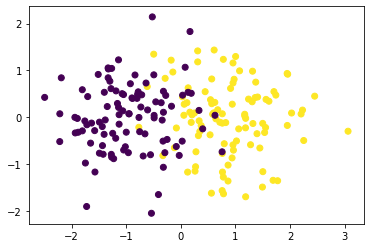

In [820]:
plotData(X, Y)

# Percepton's logic implementation

In [821]:
def forward(X, W, b):
    """This function compute <W,X>+b"""
    return np.sum(W*X)+b


def heavisideFunction(v):
    """this function compute the hard limiter"""
    return np.heaviside(v,0)
    """
    if x>0:
        return 1
    else:
        return 0
    """
    
    
def prediction(X, W, b):
    """This function return the prediction"""
    v = forward(X,W,b)
    return heavisideFunction(v)


def trainingEpochs(X, Y, W, b, N, nepochs, learningRate):
    """This function take a sampling data and train the perceptron"""
    
    lossTraining = list()
    for epoch in range(nepochs) :
        errorsEpoch = 0
        lossTrainingEpoch = list()
        print("------------------ Epoch : ",epoch,"------------------")
        for i in range(N):

            # predict the class of sample i (X[i])
            y = prediction(X[i],W,b)

            # update the weights
            err = Y[i]-y
            W = W + learningRate*err*X[i]
            
            # save the loss
            lossTrainingEpoch.append(np.abs(err))

        # The number of errors made on the training phase    
        errorsEpoch = np.sum(lossTrainingEpoch)
        print("Errors in epoch ", epoch , " >> ", errorsEpoch)
        print("Accuracy on training in epoch ", epoch ," : ", 1- errorsEpoch/N)
    
    print("\n")
    
    return W, lossTraining

def training(X, Y, W, b, N, learningRate):
    """ This function take a sampling data and train the perceptron. """
    
    lossTraining = list()
    errorZeros = 0
    errorOnes = 0
    for i in range(N):

        # predict the class of sample i (X[i])
        y = prediction(X[i],W,b)
        
        # FP and FN
        if y != Y[i]:
            if y == 0 :
                errorZeros += 1
            else :
                errorOnes += 1
        
        # update the weights
        err = Y[i]-y
        W = W + learningRate*err*X[i]

        # save the loss
        lossTraining.append(np.abs(err))

    # The number of errors made on the training phase    
    errors = np.sum(lossTraining)

    print("[TRAIN] Errors on training : ", errors)
    print("[TRAIN] Accuracy on training  : ", 1- (errors/N))
        
    return W, lossTraining, errorZeros, errorOnes

## Question 1 : Evaluate the computational complexity of the perceptron in terms of arithmetic operations per iteration.

The complexity of perceptron for one iteration is O(N) where N = 2 is in this case because N is the dimension of one elements of X

In [822]:
#bias
b = 1

# weights 
weights = np.zeros(2, dtype=int)

# learning rate
learningRate = 0.01

# loss error training 
lossTraining = list()

### Generating the training data

In [823]:
#The size of data is N = 200
N = 200

# Gaussian mean for distribution label 1 
mu_1 = np.array([1,0])

# Gaussian mean for distribution label 0
mu_2 = np.array([-1,0])

# standar deviation for Gaussian Distribution
sigma_2 = 0.5 #0.75
matrix_cov =sigma_2* np.array([[1, 0],[0, 1]]) 

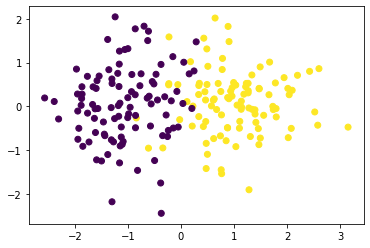

In [824]:
X_train, Y_train = generateData(N, mu_1, mu_2, sigma_2, matrix_cov)
plotData(X_train, Y_train)

### Training phase

In [825]:
import random

In [826]:
def shuffleData(X, Y):
    """ This function shuffles the data in order to evaluate the model at best. """
    Z = list(zip(X, Y))
    random.shuffle(Z)    
    X, Y = zip(*Z)
    
    return X, Y

In [827]:
learningRates = [0 , .002 , .05 , .08, .5 , 1, 2.5, 3 , 3.5, 4]
#learningRates = [2.5]
lossTraining = list()

# randomizing X_train and Y_train


X_train, Y_train = shuffleData(X_train, Y_train)

for lr in learningRates :
    lossTraining = list()
    W = np.zeros(2, dtype=int)
    
    print("------------------------------ Learning Rate = ",lr,"------------------------------")
    W, lossTraining, errorZeros, errorOnes = training(X_train, Y_train, W, b, N, lr)
    print("W : ", W)
    #plt.hist(lossTraining)
    #plt.show()    

------------------------------ Learning Rate =  0 ------------------------------
[TRAIN] Errors on training :  100.0
[TRAIN] Accuracy on training  :  0.5
W :  [0. 0.]
------------------------------ Learning Rate =  0.002 ------------------------------
[TRAIN] Errors on training :  100.0
[TRAIN] Accuracy on training  :  0.5
W :  [ 0.21109335 -0.01030242]
------------------------------ Learning Rate =  0.05 ------------------------------
[TRAIN] Errors on training :  47.0
[TRAIN] Accuracy on training  :  0.765
W :  [ 1.35172516 -0.17745362]
------------------------------ Learning Rate =  0.08 ------------------------------
[TRAIN] Errors on training :  40.0
[TRAIN] Accuracy on training  :  0.8
W :  [ 1.52676679 -0.13490082]
------------------------------ Learning Rate =  0.5 ------------------------------
[TRAIN] Errors on training :  24.0
[TRAIN] Accuracy on training  :  0.88
W :  [2.25438499 0.32909606]
------------------------------ Learning Rate =  1 ------------------------------
[T

erroOne =  12
erroZeros =  5


<ErrorbarContainer object of 3 artists>

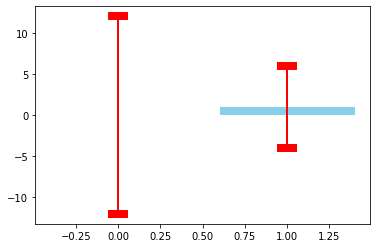

In [828]:
# errors that has been made (for the last trained perceptron)
print("erroOne = ",errorOnes)
print("erroZeros = ",errorZeros)


values = [0, 1]
errorValues = [errorOnes, errorZeros]

plt.bar(range(len(values)), values, color = 'skyblue')
plt.errorbar(range(len(values)), values, yerr = errorValues,fmt = 'none', capsize = 10, ecolor = 'red', elinewidth = 2, capthick = 8)

<ErrorbarContainer object of 3 artists>

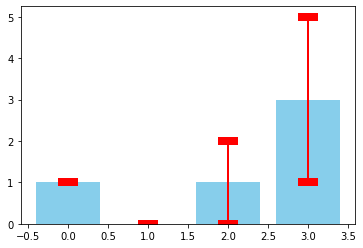

In [829]:
values = [1, 0, 1, 3]
errorValues = [0, 0, 1, 2]
plt.bar(range(len(values)), values, color = 'skyblue')
plt.errorbar(range(len(values)), values, yerr = errorValues,fmt = 'none', capsize = 10, ecolor = 'red', elinewidth = 2, capthick = 8)

## Testing 

In [830]:
def testing(X, Y, W, N, b) :
    """This function is used to test the perceptron"""
    
    errors = 0
    y_pred = np.zeros(N, int)
    for i in range(N):
        # we compute the prediction based on X and the weights W
        y = prediction(X[i], W, b)
       
        # saving the prediction
        y_pred[i] = y
        
        # if we have made an error, we must update the weight for the next iteration [w(i+1)]
        if y != Y[i] :
            errors += 1
            
    print("[TEST] Total errors = ", errors)
    print("[TEST] Accuracy = ", 1- errors/N)
    
    return y_pred


def testModel(W, b, N, mu_1, mu_2, sigma_2, matrix_cov):
    """ This function generate a Gaussian Distribution, plots it and test the perceptron on it. """
    
    X_test, Y_test = generateData(N, mu_1, mu_2, sigma_2, matrix_cov)
    plotData(X_test, Y_test)
    X_test, Y_test = shuffleData(X_test, Y_test)
    y_pred = testing(X_test, Y_test, W, N, b)

In [831]:
#The size of data is N = 200
N = 500

# Gaussian mean for distribution label 1 
mu_1 = np.array([1,0])

# Gaussian mean for distribution label 0
mu_2 = np.array([-1,0])

# standard deviation for Gaussian Distribution
sigma_2 = 0.5 #0.75
matrix_cov =sigma_2* np.array([[1, 0],[0, 1]]) 

In [832]:
W

array([11.21979308,  3.54161648])

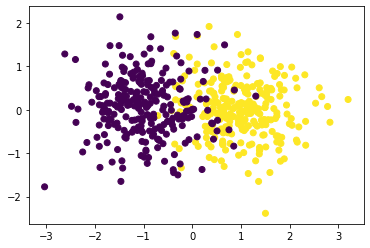

[TEST] Total errors =  44
[TEST] Accuracy =  0.912


In [833]:
testModel(W, b, N, mu_1, mu_2, sigma_2, matrix_cov)

## Question 2 : Consider four different values {0.05, 0.25, 0.50, 0.75} of the noise variance σ2. For each of these values, run the perceptron over 50 randomly generated data sets, compute the average error e(σ2) and its standard deviation s(σ2)

To be continued


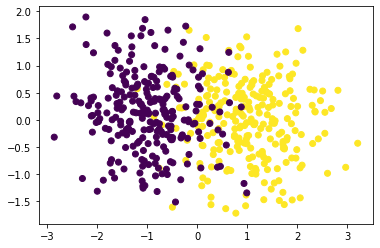

[TEST] Total errors =  54
[TEST] Accuracy =  0.892


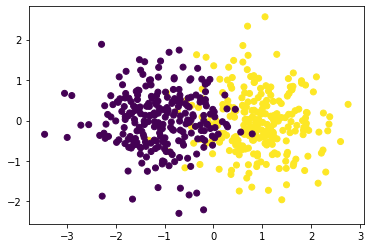

[TEST] Total errors =  43
[TEST] Accuracy =  0.914


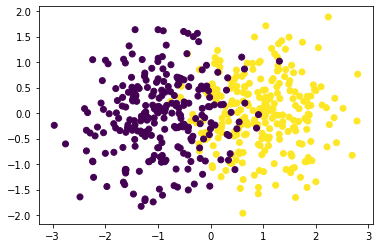

[TEST] Total errors =  57
[TEST] Accuracy =  0.886


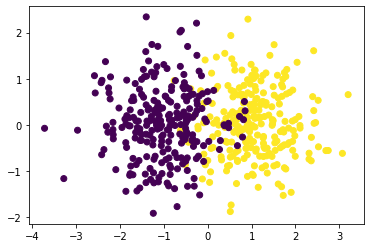

[TEST] Total errors =  45
[TEST] Accuracy =  0.91


In [834]:
sigmas_2 = [0.05, 0.25, 0.50, 0.75]
for sigma_2 in sigmas_2 :
    testModel(W, b, N, mu_1, mu_2, sigma_2, matrix_cov)